In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 9s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [0]:
建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
__________

In [0]:
載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [0]:
訓練模型
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 作業:
# 請分別選用 "MSE", "binary _crossentropy"
# 查看Train/test accurancy and loss rate

In [24]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,validation_split=0.2,
                          epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 31s 772us/step - loss: 1.8251 - acc: 0.3394 - val_loss: 1.6930 - val_acc: 0.4578
Epoch 2/10
40000/40000 [==============================] - 26s 649us/step - loss: 1.4510 - acc: 0.4766 - val_loss: 1.5247 - val_acc: 0.4935
Epoch 3/10
40000/40000 [==============================] - 27s 670us/step - loss: 1.2938 - acc: 0.5373 - val_loss: 1.3713 - val_acc: 0.5783
Epoch 4/10
40000/40000 [==============================] - 26s 661us/step - loss: 1.1887 - acc: 0.5772 - val_loss: 1.2952 - val_acc: 0.6059
Epoch 5/10
40000/40000 [==============================] - 26s 662us/step - loss: 1.0940 - acc: 0.6134 - val_loss: 1.2269 - val_acc: 0.6277
Epoch 6/10
40000/40000 [==============================] - 27s 676us/step - loss: 1.0076 - acc: 0.6412 - val_loss: 1.1360 - val_acc: 0.6539
Epoch 7/10
40000/40000 [==============================] - 27s 675us/

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

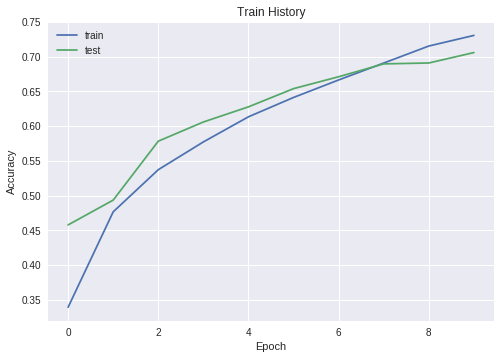

In [26]:
show_train_history('acc','val_acc')

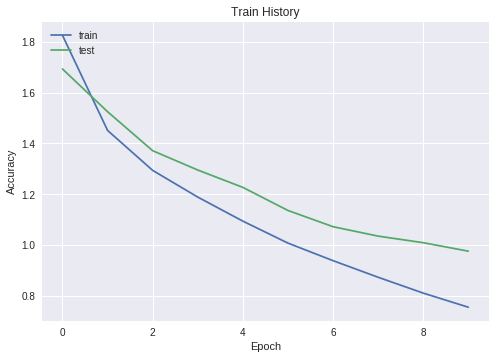

In [27]:
show_train_history('loss','val_loss')

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,validation_split=0.2,epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 700us/step - loss: 0.1056 - acc: 0.9579 - val_loss: 0.1428 - val_acc: 0.9446
Epoch 2/10
40000/40000 [==============================] - 28s 694us/step - loss: 0.1019 - acc: 0.9597 - val_loss: 0.1414 - val_acc: 0.9451
Epoch 3/10
40000/40000 [==============================] - 28s 699us/step - loss: 0.0990 - acc: 0.9609 - val_loss: 0.1391 - val_acc: 0.9466
Epoch 4/10
40000/40000 [==============================] - 28s 697us/step - loss: 0.0985 - acc: 0.9612 - val_loss: 0.1402 - val_acc: 0.9460
Epoch 5/10
40000/40000 [==============================] - 27s 686us/step - loss: 0.0955 - acc: 0.9623 - val_loss: 0.1379 - val_acc: 0.9470
Epoch 6/10
40000/40000 [==============================] - 27s 683us/step - loss: 0.0934 - acc: 0.9633 - val_loss: 0.1363 - val_acc: 0.9475
Epoch 7/10
40000/40000 [==============================] - 27s 673us/step - loss: 0.0915 - acc: 0.9639 - val_loss: 0.

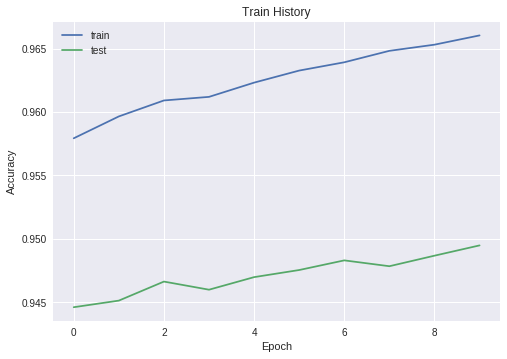

In [30]:
show_train_history('acc','val_acc')

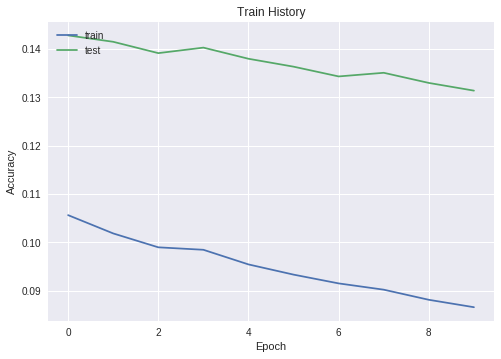

In [31]:
show_train_history('loss','val_loss')